In [18]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_folder = '/home/sid/mystuff/myprogs/flirt/projects/product_analytics/customer_segmentation/data/'

In [3]:
df = pd.read_csv(data_folder + 'raw/segmentation_data.csv')

In [4]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [5]:
df.shape

(2000, 8)

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [11]:
for column in df.columns:
    print('********', column)
    print(df[column].nunique())

******** ID
2000
******** Sex
2
******** Marital status
2
******** Age
58
******** Education
4
******** Income
1982
******** Occupation
3
******** Settlement size
3


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Sex,2000.0,4.570000e-01,0.498272,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Marital status,2000.0,4.965000e-01,0.500113,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Education,2000.0,1.038000e+00,0.599780,0.0,1.000000e+00,1.0,1.000000e+00,3.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0
Occupation,2000.0,8.105000e-01,0.638587,0.0,0.000000e+00,1.0,1.000000e+00,2.0
Settlement size,2000.0,7.390000e-01,0.812533,0.0,0.000000e+00,1.0,1.000000e+00,2.0


### Checking distributions

In [14]:
import scipy.stats as stats

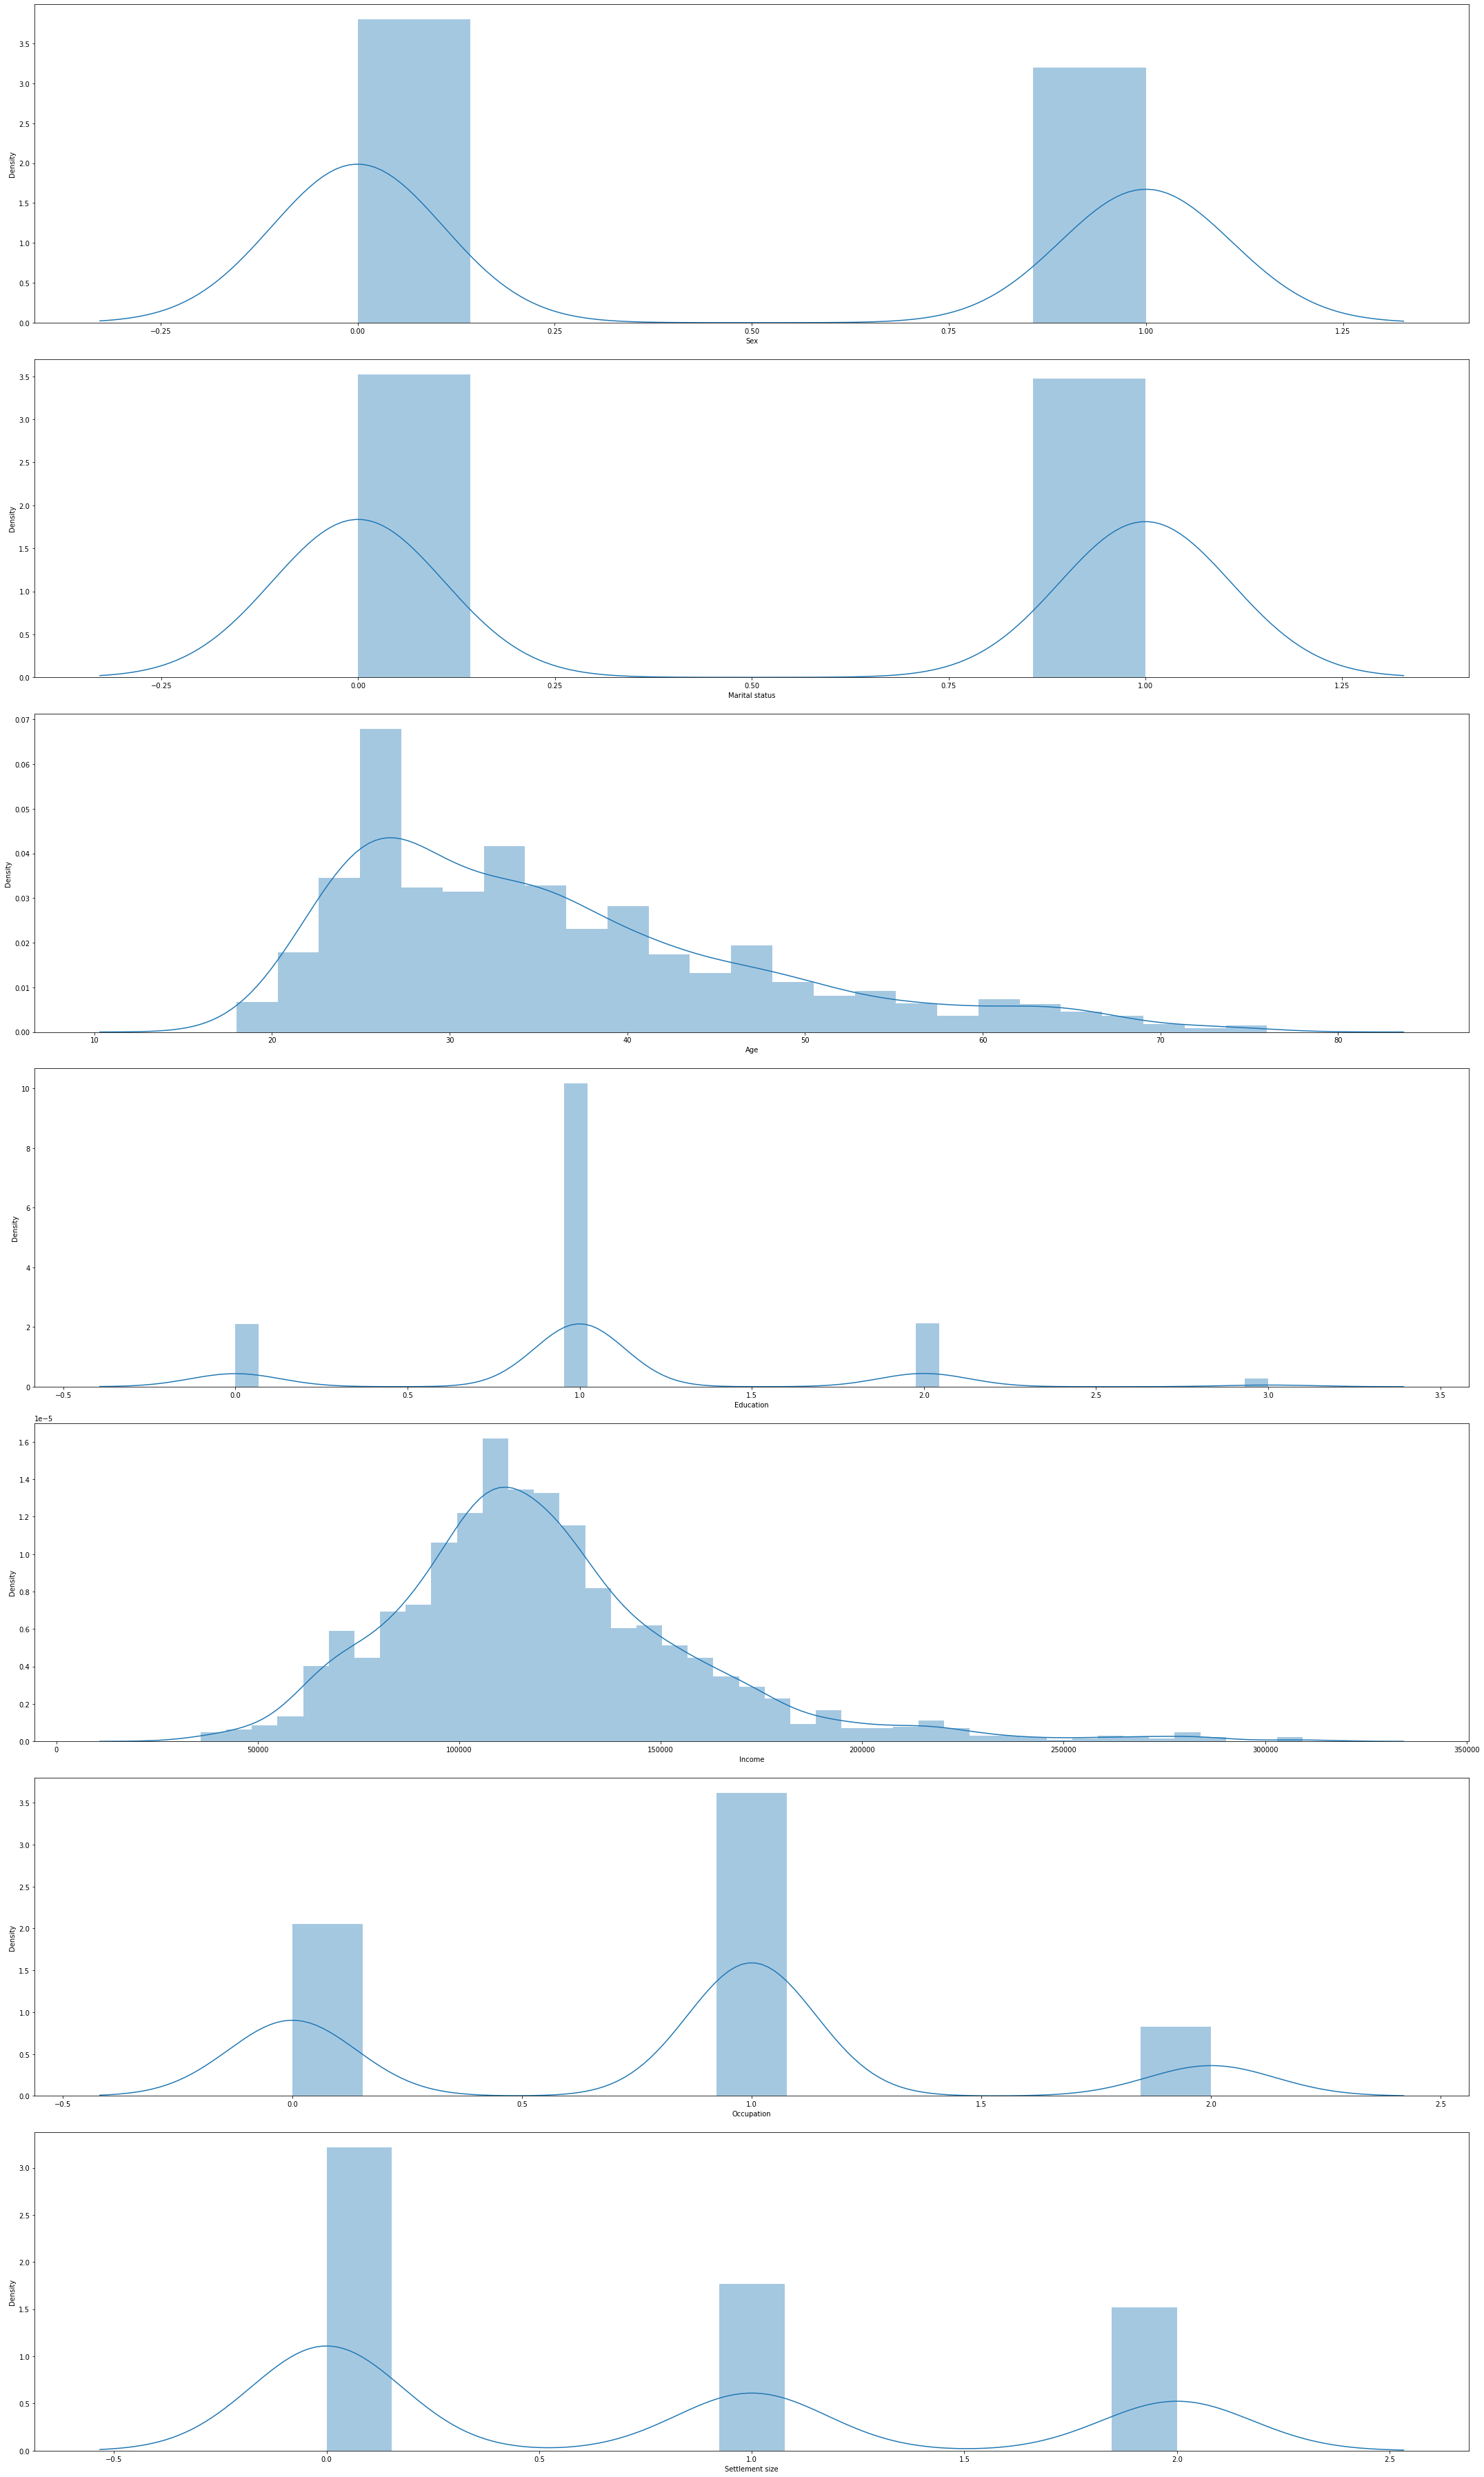

In [24]:
fig, axes = plt.subplots(nrows=len(df.columns[1:]), figsize=(30, 50))

for ax, col in zip(axes, df.columns[1:]):
    sns.distplot(df[col], ax=ax)
   # plt.title(col)
    plt.tight_layout()
    
plt.show()

### Checking q-q plots 

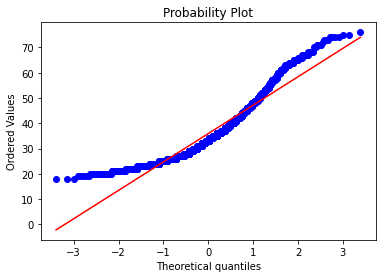

In [25]:
stats.probplot(df['Age'], dist='norm', plot=plt)
plt.show()

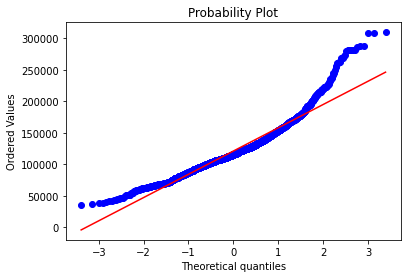

In [26]:
stats.probplot(df['Income'], dist='norm', plot=plt)
plt.show()

### Checking for outliers

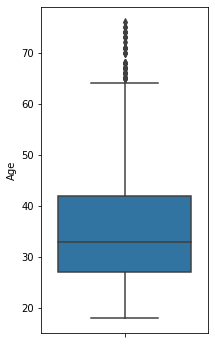

In [33]:
plt.figure(figsize=(3, 6))
sns.boxplot(y=df['Age']);

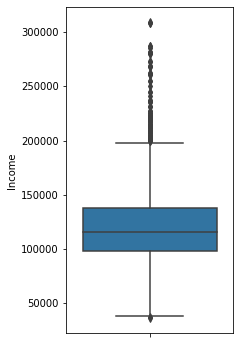

In [34]:
plt.figure(figsize=(3, 6))
sns.boxplot(y=df['Income']);

In [35]:
def boundaries(df, column, dist):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    
    lower = df[column].quantile(0.25) - iqr * dist
    upper = df[column].quantile(0.75) + iqr * dist
    
    return upper, lower

In [36]:
upper_age, lower_age = boundaries(df, 'Age', 1.5)
upper_age, lower_age

(64.5, 4.5)

In [38]:
upper_income, lower_income = boundaries(df, 'Income', 1.5)
upper_income, lower_income

(198685.75, 37049.75)

### Checking Data Magnitude

In [39]:
df.max() - df.min()

ID                   1999
Sex                     1
Marital status          1
Age                    58
Education               3
Income             273532
Occupation              2
Settlement size         2
dtype: int64

### Correlation

In [40]:
corr = df.corr()

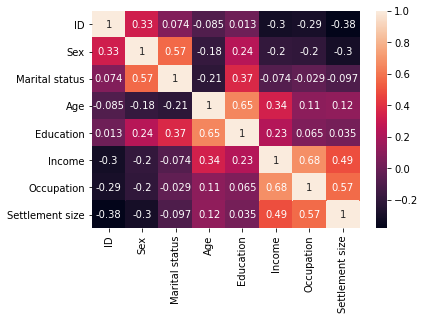

In [45]:
sns.heatmap(corr, annot=True);

### Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
df_scaled = scaler.fit_transform(df)

In [51]:
df_scaled

array([[-1.731185  , -0.91739884, -0.99302433, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [-1.72945295,  1.09003844,  1.00702467, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-1.7277209 , -0.91739884, -0.99302433, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [ 1.7277209 , -0.91739884, -0.99302433, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.72945295,  1.09003844,  1.00702467, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [ 1.731185  , -0.91739884, -0.99302433, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [53]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns.values)

In [54]:
df_scaled.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


In [56]:
df_scaled.to_csv(data_folder + 'processed/segmentation_scaled.csv')